In [2]:
# library to clean data
import re

# Natural Language Tool Kit
import nltk

nltk.download('stopwords')

# to remove stopword
from nltk.corpus import stopwords

# for Stemming propose
from nltk.stem.porter import PorterStemmer

# Initialize empty array
# to append clean text
corpus = []

# 1000 (reviews) rows to clean
for i in range(0, 1000):
	
	# column : "Review", row ith
	review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
	
	# convert all cases to lower cases
	review = review.lower()
	
	# split to array(default delimiter is " ")
	review = review.split()
	
	# creating PorterStemmer object to
	# take main stem of each word
	ps = PorterStemmer()
	
	# loop for stemming each word
	# in string array at ith row
	review = [ps.stem(word) for word in review
				if not word in set(stopwords.words('english'))]
				
	# rejoin all string array elements
	# to create back into a string
	review = ' '.join(review)
	
	# append each string to create
	# array of clean text
	corpus.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()

# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values


In [4]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [5]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier

# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results
model = RandomForestClassifier(n_estimators = 501,
							criterion = 'entropy')
							
model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=501)

In [6]:
# Predicting the Test set results
y_pred = model.predict(X_test)

y_pred


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)

cm


array([[106,  15],
       [ 42,  87]], dtype=int64)

In [11]:
acc = accuracy_score(y_test, y_pred)
acc

0.772

------------------------------------------------------------------------------------------------------------------------------

In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data = pd.read_csv('flipkart_data.csv')
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [10]:
# unique ratings
pd.unique(data['rating'])


array([5, 4, 1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='rating', ylabel='count'>

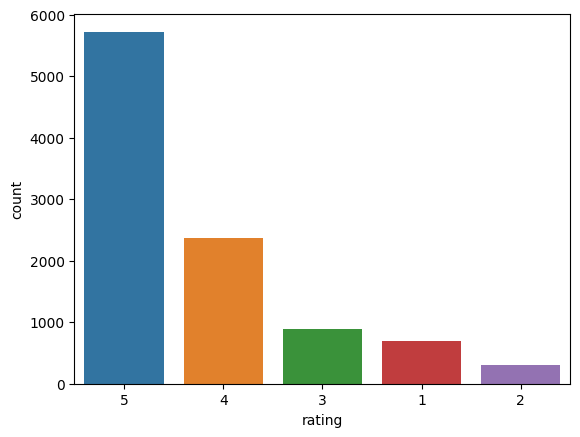

In [11]:
sns.countplot(data=data, x='rating', order=data.rating.value_counts().index)


In [12]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg


In [13]:
from tqdm import tqdm


def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)

        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower()
                                    for token in nltk.word_tokenize(sentence)
                        if token.lower() not in stopwords.words('english')))

    return preprocessed_text


In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review


100%|█████████████████████████████████████████████████████████████████████████████| 9976/9976 [00:45<00:00, 217.47it/s]


In [16]:
data.head()


,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


In [25]:
data["label"].value_counts()


1    5726
0    4250
Name: label, dtype: int64

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

scores = []
for sentence in data['review']:
  score = analyser.polarity_scores(sentence)
  scores.append(score)
  
scores = pd.DataFrame(scores)

data['Compound'] = scores['compound']
data['Negative'] = scores['neg']
data['Neutral'] = scores['neu']
data['Positive'] = scores['pos']
data.head()

,review,rating,label,Compound,Negative,Neutral,Positive
0,nice produt like design lot easy carry looked ...,5,1,0.8020,0.0,0.423,0.577
1,awesome soundvery pretty see nd sound quality ...,5,1,0.9501,0.0,0.349,0.651
2,awesome sound quality pros 78 hrs battery life...,4,0,0.9440,0.0,0.725,0.275
3,think good product per quality also design qui...,5,1,0.9712,0.0,0.502,0.498
4,awesome bass sound quality good bettary long l...,5,1,0.8992,0.0,0.501,0.499


In [21]:
# Set type of polarity
polarity = []

for i in range(len(data)):
  if (data['Compound'][i] < 0):
    polarity.append("Negative")
  elif (data['Compound'][i] > 0):
    polarity.append("Positive")
  else:
    polarity.append("Neutral")
    
polarity = pd.DataFrame(polarity)
data['Polarity'] = polarity
data.head()

,review,rating,label,Compound,Negative,Neutral,Positive,Polarity
0,nice produt like design lot easy carry looked ...,5,1,0.8020,0.0,0.423,0.577,Positive
1,awesome soundvery pretty see nd sound quality ...,5,1,0.9501,0.0,0.349,0.651,Positive
2,awesome sound quality pros 78 hrs battery life...,4,0,0.9440,0.0,0.725,0.275,Positive
3,think good product per quality also design qui...,5,1,0.9712,0.0,0.502,0.498,Positive
4,awesome bass sound quality good bettary long l...,5,1,0.8992,0.0,0.501,0.499,Positive


In [22]:
data["Polarity"].value_counts()

Positive    6841
Neutral     2367
Negative     768
Name: Polarity, dtype: int64

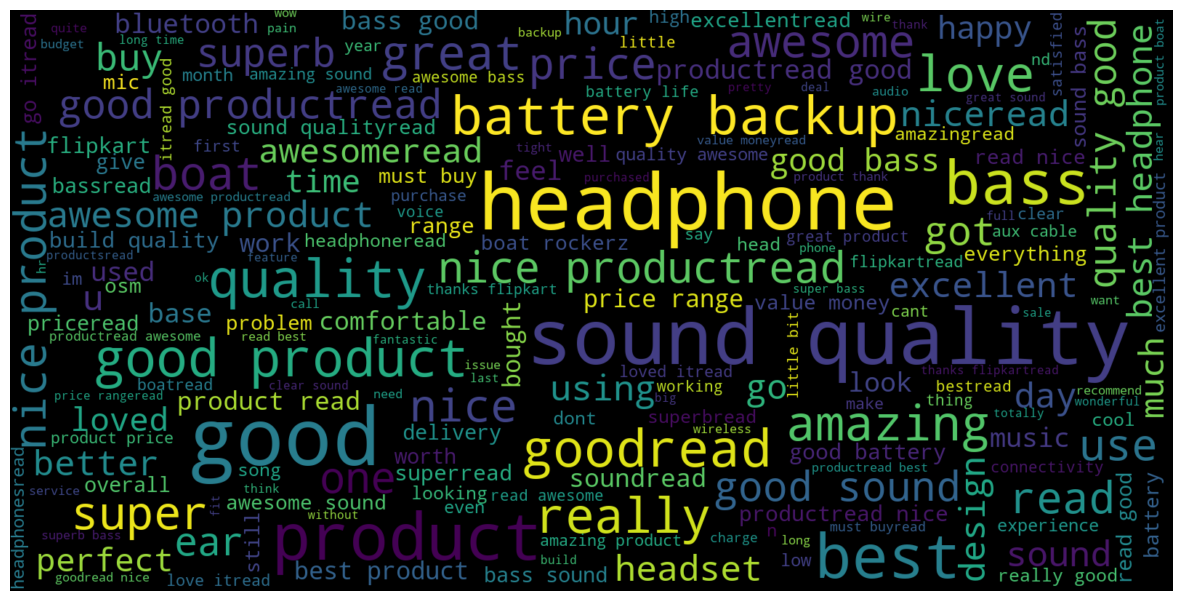

In [26]:
consolidated = ' '.join(word for word in data['review'][data['label'] == 1]
                        .astype(str))
wordCloud =WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [27]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()


In [28]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
                    test_size=0.33,stratify=data['label'],random_state = 42)


In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))


0.9247344007182403


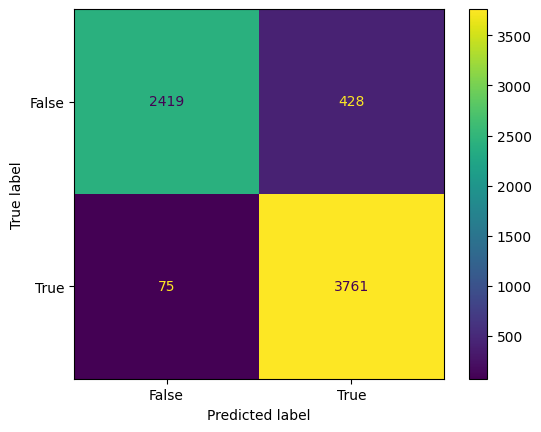

In [31]:
from sklearn import metrics
cm = confusion_matrix(y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()


----------------------------------------------------------------------------------------------------------------------------

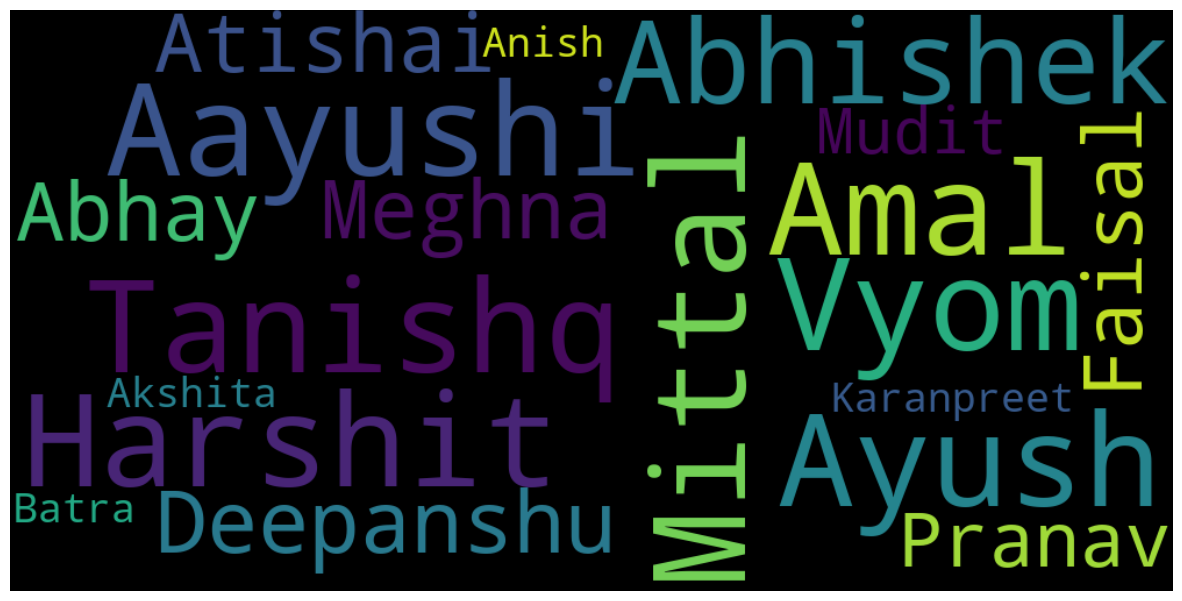

In [5]:
consolidated = ' '.join(word for word in {'Harshit', 'Vyom', 'Karanpreet', 'Mittal', 'Mudit', 'Batra', 'Pranav', 'Aayushi', 
                                          'Akshita', 'Anish', 'Atishai', 'Meghna', 'Deepanshu', 'Tanishq', 'Abhay', 'Faisal', 
                                          'Abhishek', 'Amal', 'Ayush'})
wordCloud = WordCloud(width=1000, height=500,random_state=20, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

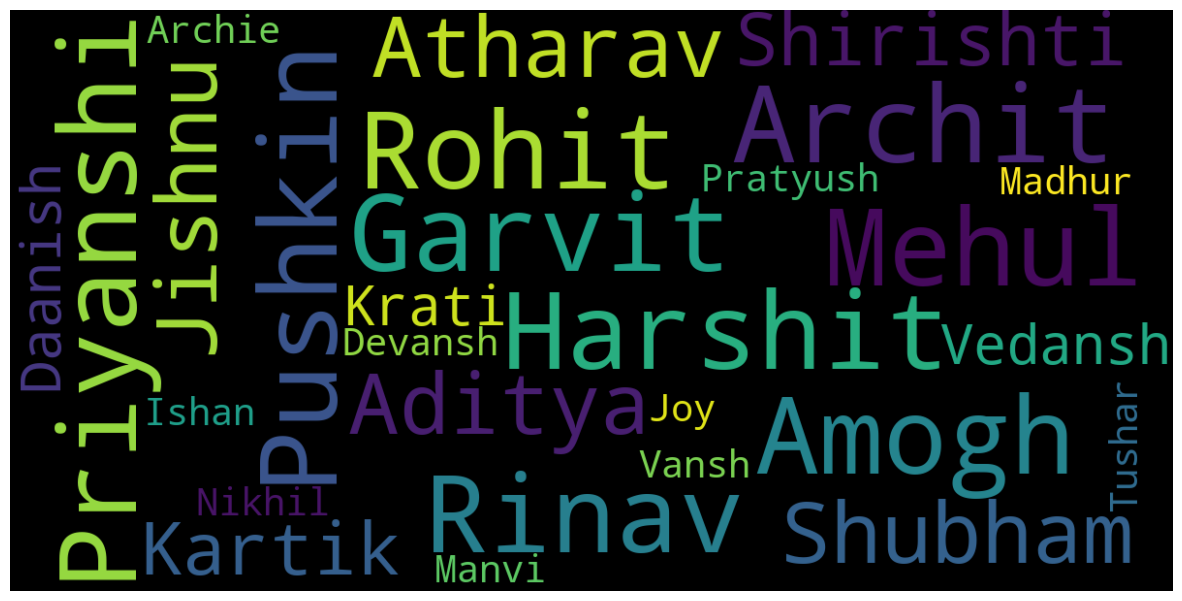

In [46]:
consolidated = ' '.join(word for word in {'Harshit', 'Rinav', 'Madhur', 'Nikhil', 'Priyanshi', 'Vedansh', 'Kartik', 'Pratyush', 
                                          'Vansh', 'Rohit', 'Shubham', 'Garvit', 'Tushar', 'Aditya', 'Manvi', 'Archie', 
                                          'Pushkin', 'Devansh', 'Ishan', 'Daanish', 'Joy', 'Jishnu', 'Archit', 'Krati', 
                                          'Atharav', 'Mehul', 'Amogh', 'Vansh', 'Shirishti'})
wordCloud = WordCloud(width=1200, height=600,random_state=20, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()